이번에 공부할 범위는,

### 2.1 분포
- 분포 개념 
- 정규 분포 
- 표준 정규 분포
- 중심 극한 정리
- 첨도
- 왜도

In [1]:
# A) 분포 개념

**분포**

* 확률 변수가 특정한 값을 가질 확률을 나타내는 함수
* 그래프로 나타낸다면 가로축은 가질 수 있는 값이, 세로축은 그 값이 나올 확률
* 각 값과 확률과의 관계가 분포 함수

예1)동전을 1번 던져서 앞면이 나오는 횟수를 변수로 둔다면,<br>
* 나올 수 있는 변수의 값은 0 혹은 1
* 0일 확률은 50%, 1일 확률도 50%
* 두 확률을 더하면 1


예2)동전을 4번 던져서 앞면이 나오는 횟수를 변수로 둔다면, <br>
* 나올 수 있는 변수의 값: {0,1,2,3,4}
* 각 변수 값에 대한 확률: {0:0.125, 1:0.375, 2:0.5, 3:0.375, 4:0.125}

<img src=0005.png>

> 분포: 각 변수의 값 대비 확률 값을 표현한 것 <br>
> 확률 분포 함수: 변수와 확률 간의 관계를 수식으로 나타낸 것

In [2]:
# B) 정규 분포

**정규 분포**

평균($\mu$)과 표준편차($\sigma$)에 대해 아래와 같은 확률 분포 함수식을 만족하는 분포

확률분포식:    
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{{(x-\mu)}^2}{2\sigma^2})$$

정규분포 곡선 모양:
<img src='0006.png'>

정규분포 곡선 특징: <br>
* 정규분포 곡선은 좌우 대칭. 곡선 아래 면적은 1
* 평균 == 중앙값 == 최빈값

정규분포가 중요한 이유:  
* 많은 현상과 자료들이 정규분포와 유사한 분포를 띄고 있기에, 그 현상에서 특정 사건이 일어날 확률(=어떤 값에 대한 확률)을 정규분포 함수식에 넣어서 계산할 수 있기 때문

In [3]:
# C) 표준 정규 분포

**표준 정규 분포**

정규 분포를 평균이 0, 표준편차가 1이되게 정규화한 분포

정규화 수식:  $ Z = \frac{X-\mu}{\sigma} $

표준정규분포 곡선:  
<img src='0007.png'>

In [ ]:
# D) 중심 극한 정리

**중심 극한 정리**

"어떤 데이터에서 충분히 많은 표본을 뽑아내기만 하면, 그 표본 평균은 모평균을 중심으로 정규분포를 따른다"

```
예를들어, 어떤 모집단이 있는데 이 모집단의 평균은 36이고, 데이터의 꼬리가 오른쪽으로 긴 데이터라고하자.
이 모집단에서 표본 샘플들을 여러 번 뽑아내면서 표본의 평균을 구해보면, 그 값들은 모평균인 36을 중심으로한 정규분포를 띤다는 것이다.
```

<img src='0011.png'>

> 어떠한 분포를 띤 집단에 대해서도, 표본을 뽑아내서 평균을 내면, 그 평균들은 정규분포를 띤다. <br>
--> 표본들을 뽑아내보면, 그 평균에 대한 기댓값(=평균)은 모평균과 같다. !!!

모평균 50.09711892291596


[]

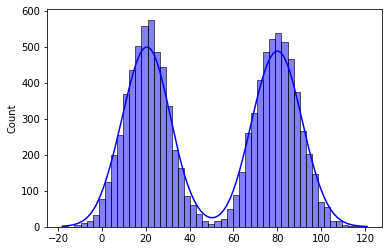

In [297]:
# 쌍봉 데이터 만들기
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(123)
arr_pop = np.concatenate([
    np.random.normal(loc=20, scale=10, size=5000),
    np.random.normal(loc=80, scale=10, size=5000),
])
print('모평균', np.mean(arr_pop))

sns.histplot(arr_pop, kde=True, color='blue', bins=50)
plt.plot()

표본평균의 기댓값: 50.10935255175591


[]

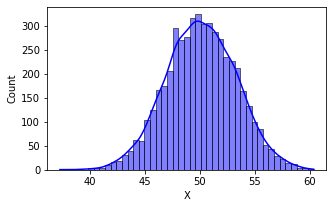

In [296]:
lst = []
np.random.seed(123)
for i in range(5000):
    idx = np.random.choice(10000, size=100)
    lst.append(np.mean(arr_pop[idx]))
print('표본평균의 기댓값:', np.mean(lst))

fig = plt.figure(figsize=(5,3))
sns.histplot(lst, kde=True, color='blue')
plt.xlabel('X')
plt.plot()

In [4]:
# E) 첨도(尖度, kurtosis, 커토시스)

**첨도(kurtosis)**

분포가 중심에 어느 정도 몰려 있는가를 나타내는 값

분포 곡선의 모양으로 얘기한다면, 곡선의 가운데 부분이 뾰쪽한 정도를 나타낸다고 할 수 있다. 

자료의 첨도 값을 k라 할 때,

* k == 0 : 정규분포와 같음
* k > 0 : 정규분포보다 더 뾰족
* k < 0 : 정규분포보다 더 완만한 모양

<img src='0008.png'>

> Series의 `kurtosis` 함수 이용

In [154]:
# kurtosis K==0  k>0  k<0 인 데이터 만들기
import pandas as pd
import numpy as np

np.random.seed(0)
# 1)정규분포 k==0
arr_nor = np.random.normal(loc=50, scale=10, size=1000)

# 2) sharp k > 0
arr_sharp = np.concatenate([
    np.random.normal(loc=50, scale=10, size=500),
    np.random.normal(loc=50, scale=3, size=500),
])

# 3) smooth k < 0 
arr_smooth = np.concatenate([
    np.random.normal(loc=50, scale=10, size=400),
    np.random.normal(loc=30, scale=10, size=300),
    np.random.normal(loc=70, scale=10, size=300),
])


df = pd.DataFrame({
    'normal':arr_nor, 
    'sharp':arr_sharp,
    'smooth':arr_smooth
})
df.kurtosis()

normal   -0.040977
sharp     2.292955
smooth   -0.682946
dtype: float64

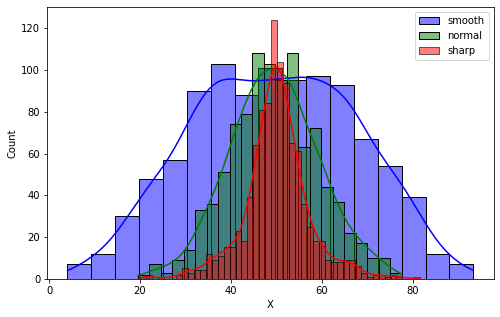

In [161]:
import seaborn as sns
fig = plt.figure(figsize=(8,5))

sns.histplot(df['smooth'], kde=True, color='blue', label='smooth')
sns.histplot(df['normal'], kde=True, color='green', label='normal')
sns.histplot(df['sharp'], kde=True, color='red', label='sharp')
plt.xlabel('X')
plt.legend()
plt.show()

In [156]:
# F) 왜도(歪度, skewness, 스큐니스)

**왜도 (skewness)**

왜도는 비대칭도를 나타내는 값

<img src='0009.png'>

* sk > 0 : skewed to the right. 오른 쪽으로 꼬리가 길다
* sk == 0 : 정규분포
* sk < 0 : skewed to the left. 왼 쪽으로 꼬리가 길다.

왜도에 따른 평균, 중앙값, 최빈값의 위치 (특히 중앙값과 평균의 위치 주의)

<img src='0010.png'>

<br>
왜도 계산식:

$ sk = \frac{3(\bar{x}-Md)}{s} $, s:표준편차 

> 계산 방법: Series의 `skew` 함수 사용

In [237]:
# skewness sk==0  sk>0  sk<0 인 데이터 만들기
import pandas as pd
import numpy as np

np.random.seed(0)
# 1)정규분포 k==0
arr_nor = np.random.normal(loc=50, scale=10, size=1000)

# 2) skewed to the right: sk > 0
arr_right = np.concatenate([
    np.random.normal(loc=50, scale=10, size=300),
    np.random.normal(loc=30, scale=7, size=700),
])

# 3) skewed to the left sk < 0 
arr_left = np.concatenate([
    np.random.normal(loc=50, scale=10, size=300),
    np.random.normal(loc=70, scale=7, size=700),
])

df = pd.DataFrame({
    'normal':arr_nor, 
    'right':arr_right,
    'left':arr_left
})
df.skew()

normal    0.033910
right     0.752162
left     -0.811409
dtype: float64

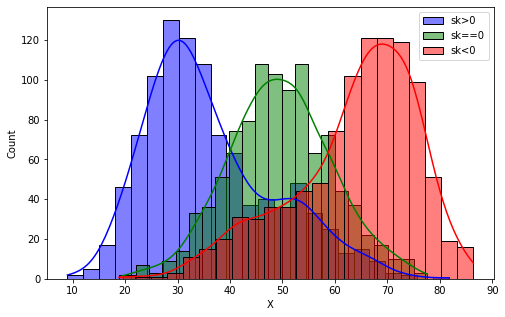

In [238]:
import seaborn as sns
fig = plt.figure(figsize=(8,5))

sns.histplot(df['right'], kde=True, color='blue', label='sk>0')
sns.histplot(df['normal'], kde=True, color='green', label='sk==0')
sns.histplot(df['left'], kde=True, color='red', label='sk<0')
plt.xlabel('X')
plt.legend()
plt.show()

---

예제 2.1~2.2 문제에 대해서 heart.csv 데이터를 이용하시오.

* 데이터 출처: kaggel 'Heart Disease UCI' data (https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv)

* 파일 직접 다운로드 링크: https://blog.kakaocdn.net/dn/cwmpo4/btqWVRG3FrS/l0LrW7TikBKEkMjYUxYKr0/heart.csv?attach=1&knm=tfile.csv
   
  혹은, 이 페이지에서 다운로드  https://infograph.tistory.com/262  

---

**예제 2.1**

heart 데이터를 읽어낸 후, 수치형 데이터 칼럼 {'age', 'trestbps', 'chol', 'thalach', 'oldpeak'}에 대해서 분포 곡선을 그렸을 때, 평균 주변에서의 곡선 모양이 가장 뾰족한(평균 주변에 가장 데이터가 많은) 칼럼 이름을 적으시오.

---

In [298]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [299]:
df1 = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df1.kurtosis()

age        -0.542167
trestbps    0.929054
chol        4.505423
thalach    -0.061970
oldpeak     1.575813
dtype: float64

In [ ]:
# 답: chol

---

**예제 2.2**

heart 데이터를 읽어낸 후, 수치형 데이터 칼럼 {'age', 'trestbps', 'chol', 'thalach', 'oldpeak'}에 대해서 정규화를 해서 [0,1]까지의 데이터로 변환하고, 변환된 칼럼 중 (평균 - 중앙값)이 가장 큰 칼럼명을 적으시오.

---

In [300]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [302]:
df1 = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df1.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

In [ ]:
# 답: oldpeak

In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
arr = scaler.transform(df1)
df2 = pd.DataFrame(arr, columns=df1.columns)
df2.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

In [305]:
def diff(s):
    return s.mean() - s.median()

dic = {}
for col in df2.columns:
    dic[col] = diff(df2[col])
dic

{'age': -0.013201320132013139,
 'trestbps': 0.015318512983373833,
 'chol': 0.014301430143014326,
 'thalach': -0.025596452775048628,
 'oldpeak': 0.038645800063877356}

In [ ]:
# 답: oldpeak